In [61]:

import pandas as pd     
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from collections import Counter 
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder

In [54]:
df = pd.read_excel("yorumlar.xlsx")

In [55]:
df.head()

,Cümle,Durum
0,20 dk 1 GB internet 500 mb sadece kaşar turkce...,olumsuz
1,Ayrıca turkcell superonline reklamı kadar da k...,olumsuz
2,Turkcell çok pahalı ya,olumsuz
3,Turkcell Kaş'ta internetin cekmiyor,olumsuz
4,Turkcell'in Allah belası versin demek isterdim...,olumsuz


In [56]:
df["Cümle"]=df["Cümle"].apply(lambda x: word_tokenize(x.lower()))
df.head()

,Cümle,Durum
0,"[20, dk, 1, gb, internet, 500, mb, sadece, kaş...",olumsuz
1,"[ayrıca, turkcell, superonline, reklamı, kadar...",olumsuz
2,"[turkcell, çok, pahalı, ya]",olumsuz
3,"[turkcell, kaş'ta, internetin, cekmiyor]",olumsuz
4,"[turkcell'in, allah, belası, versin, demek, is...",olumsuz


In [58]:
#**Remove Punctuation and numbers and chars like "*" and "#"**
df["Cümle"]=df["Cümle"].apply(lambda x: list(i for i in x if i.isalpha()))
# **Remove Stopwords**
stop_words = stopwords.words('turkish')
df["Cümle"]=df["Cümle"].apply(lambda x: list(i for i in x if i not in stop_words))
# **lemmatization**
lem=WordNetLemmatizer()
df["Cümle"]=df["Cümle"].apply(lambda x: list(lem.lemmatize(i) for i in x))
# join
df["Cümle"]=df["Cümle"].apply(lambda x: " ".join(x))

In [86]:
    from sklearn.feature_extraction.text import TfidfVectorizer
    vectorizer = TfidfVectorizer(stop_words={'turkish'})
    X = vectorizer.fit_transform(df["Cümle"])

In [65]:
from yellowbrick.cluster import KElbowVisualizer

In [66]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

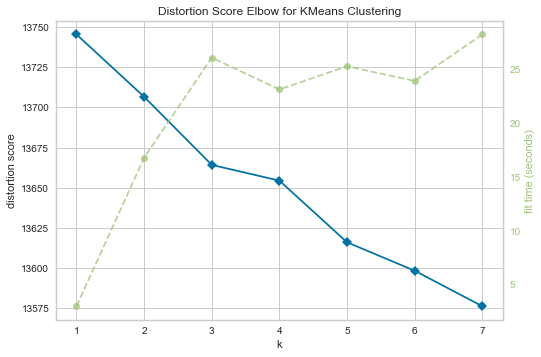

In [89]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k=(1, 8))
visu.fit(X)
visu.poof()

In [90]:
kmeans_model = KMeans(n_clusters=3).fit(X)

In [91]:
pred = kmeans_model.predict(X)
print(pred)

[0 1 0 ... 0 0 0]


In [92]:
np.unique(pred, return_counts=True)

(array([0, 1, 2]), array([11497,  1169,  1165], dtype=int64))

In [93]:
df["clusters"] = pred
df.head()

,Cümle,Durum,clusters
0,dk gb internet mb sadece kaşar turkcell düşer ...,olumsuz,0
1,ayrıca turkcell superonline reklamı kadar kötü...,olumsuz,1
2,turkcell pahalı,olumsuz,0
3,turkcell internetin cekmiyor,olumsuz,0
4,allah belası versin demek isterdim demicem dem...,olumsuz,0


In [98]:
df[df["clusters"]==0]

,Cümle,Durum,clusters
0,dk gb internet mb sadece kaşar turkcell düşer ...,olumsuz,0
2,turkcell pahalı,olumsuz,0
3,turkcell internetin cekmiyor,olumsuz,0
4,allah belası versin demek isterdim demicem dem...,olumsuz,0
5,canın cehenneme turkcell,olumsuz,0
...,...,...,...
13826,turkcell kazık takıl sen bimcell le kxkskx yak...,olumsuz,0
13827,turkcell merhaba senelik dostlugumuz var odeme...,olumlu,0
13828,turkcellhizmet merhaba numarami bir baska oper...,olumsuz,0
13829,iyi herkes turkcell abonesi değil,notr,0


In [99]:
positive =  df[df["clusters"]==1]
notr = df[df["clusters"]==2]
negative= df[df["clusters"]==0]

In [100]:
from wordcloud import WordCloud

In [101]:
col_pos= " ".join(positive["Cümle"])

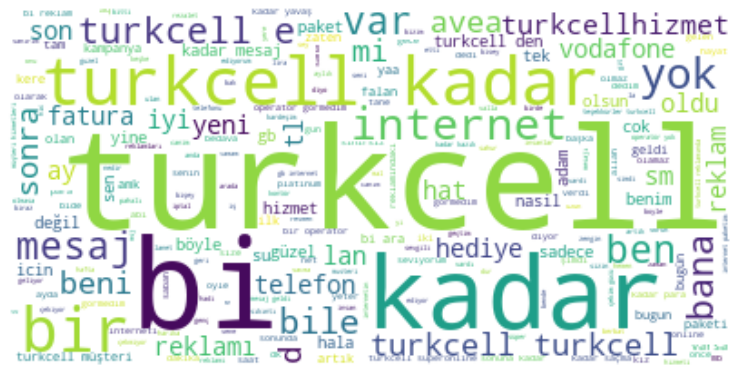

In [102]:
wordcloud = WordCloud(background_color="white", max_words=1000)
wordcloud.generate(col_pos)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [103]:
col_neg = " ".join(negative["Cümle"])

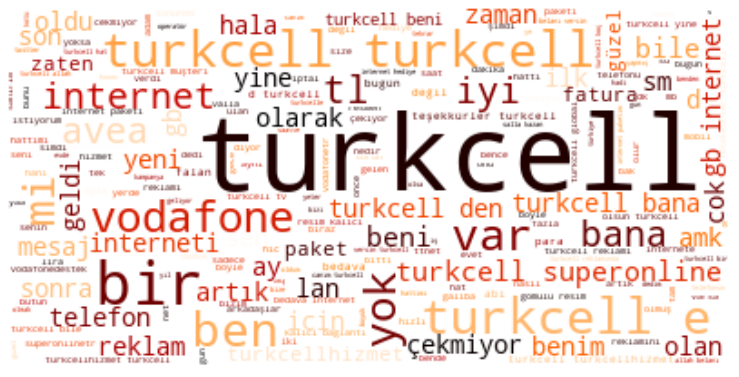

In [104]:
wordcloud = WordCloud(background_color="white", max_words=1000, colormap="gist_heat")
wordcloud.generate(col_neg)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [105]:
col_nr = " ".join(notr["Cümle"])

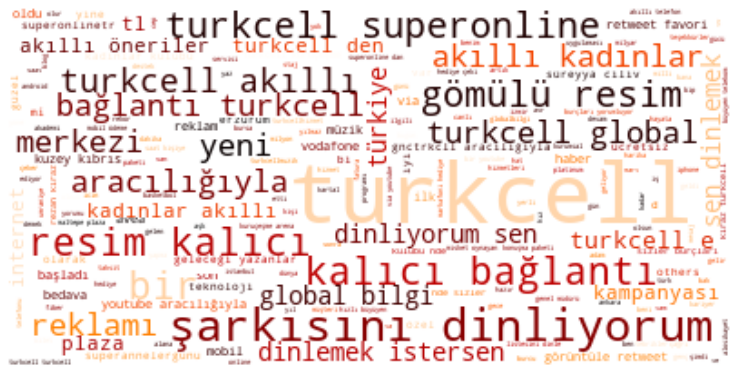

In [106]:
wordcloud = WordCloud(background_color="white", max_words=1000, colormap="gist_heat")
wordcloud.generate(col_nr)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()